## Задание по библиотекам Pandas и Matplotlib
### Лабораторная работа № 3 по дисциплине "Технологии программирования"

Подключаем необходимые библиотеки:

In [ ]:
import numpy as np
import pandas as pd

Скачиваем датасет с информацией о пассажирах Титаника:

In [ ]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2024-12-23 00:31:46--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv.1’

titanic.csv.1       100%[===================>]  43.19K  95.9KB/s    in 0.5s    

2024-12-23 00:31:47 (95.9 KB/s) - ‘titanic.csv.1’ saved [44225/44225]



Проверяем наличие скачанного датасета:



In [ ]:
!ls

sample_data  titanic.csv


Значения колонок датасета следующие (__в соответствии с информацией с сайта__):
*    Survived Indicator (выжил пассажир или нет)
*    Passenger Class (класс)
*    Name (имя)
*    Sex (пол)
*    Age (возраст)
*    Siblings/Spouses Aboard (есть ли братья, сестры или супруг(а) на борту)
*    Parents/Children Aboard (есть ли родители или дети на борту)
*    Fare paid in £s (цена билета в фунтах стерлингов)

Загружаем данные и формируем Pandas DataFrame:

In [107]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


__С использованием датафрейма нужно выполнить следующие задания__.

1. Определите, содержит ли какой-нибудь столбец датасета пропущенные значения.

In [ ]:
df.isna().sum().sum()

0

2. В соответствии с вариантом, определите:

   1. Количество женщин старше 50 лет на борту.
   2. Количество пассажиров, путешествующих вторым классом вместе с родителями или детьми.
   3. Число погибших детей в возрасте до 12 лет, путешествующих первым классом.
   4. Среднее значение коэффициента выживаемости десяти пассажиров третьего класса с самыми дорогими билетами.
   5. Среднее значение цены билета пассажиров, путешествующих без родственников.

In [ ]:
third_class_passengers = df[df['Pclass'] == 3]

# Сортируем по цене билета в порядке убывания
sorted_passengers = third_class_passengers.sort_values(by='Fare', ascending=False)

# Выбираем первых десять пассажиров
top_10_expensive_passengers = sorted_passengers.head(10)

# Рассчитываем среднее значение коэффициента выживаемости
average_survival_rate = top_10_expensive_passengers['Survived'].mean()
average_survival_rate

0.2

3. Постройте диаграмму распределения значений цены билета по всем пассажирам. Проинтерпретируйте результат. Можно ли сказать, что в данных наблюдаются выбросы?

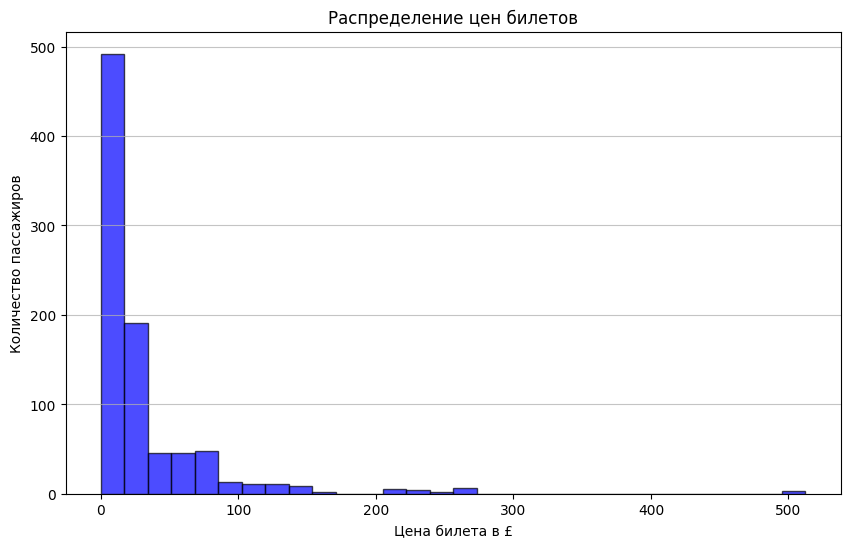

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=30, color='blue', alpha=0.7, edgecolor='black')

plt.title('Распределение цен билетов')
plt.xlabel('Цена билета в £')
plt.ylabel('Количество пассажиров')

plt.grid(axis='y', alpha=0.75)
plt.show()

4. В соответствии с вариантом, определите, верны ли следующие утверждения. Приведите доказательства ответа.

  1. Чем дороже билет, тем выше вероятность выжить.
  2. Мужчинам в катастрофе выжить проще.
  3. Чем больше родственников у человека, тем выше шанс того, что он купит билет третьего класса.
  4. Если Вам больше 70 лет, то шансов выжить в катастрофе у Вас практически нет.
  5. Чем больше родственников у чаловека, тем выше его шанс погибнуть.

In [ ]:
seventy_years = df[df['Age'] > 70]

# Сортируем по цене билета в порядке убывания
sorted_passengers = seventy_years.sort_values(by='Fare', ascending=False)

# Выбираем первых десять пассажиров

# Рассчитываем среднее значение коэффициента выживаемости
average_survival_rate = sorted_passengers['Survived'].mean()
average_survival_rate

0.2

5. Столбец с именем пассажиров вряд ли будет иметь значение для последующего анализа данных. Удалите этот столбец из датафрейма. Выведите на экран полученный датасет.

In [108]:
del df['Name']

In [ ]:
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


6. Столбец "пол пассажира" является категориальным. Закодируйте его с помощью ohe-hot-кодирования (OHE). Выведите на экран полученный датасет.

In [ ]:
one_hot = pd.get_dummies(df['Sex'])
# Drop column B as it is now encoded
a = df.drop('Sex',axis = 1)
# Join the encoded df
s = a.join(one_hot)
s

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,female,male
0,0,3,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,True,False
2,1,3,26.0,0,0,7.9250,True,False
3,1,1,35.0,1,0,53.1000,True,False
4,0,3,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000,False,True
883,1,1,19.0,0,0,30.0000,True,False
884,0,3,7.0,1,2,23.4500,True,False
885,1,1,26.0,0,0,30.0000,False,True


7. Постройте диаграмму рассеяния между признаками "Возраст" и "Цена билета". Проинтерпретируйте ответ.

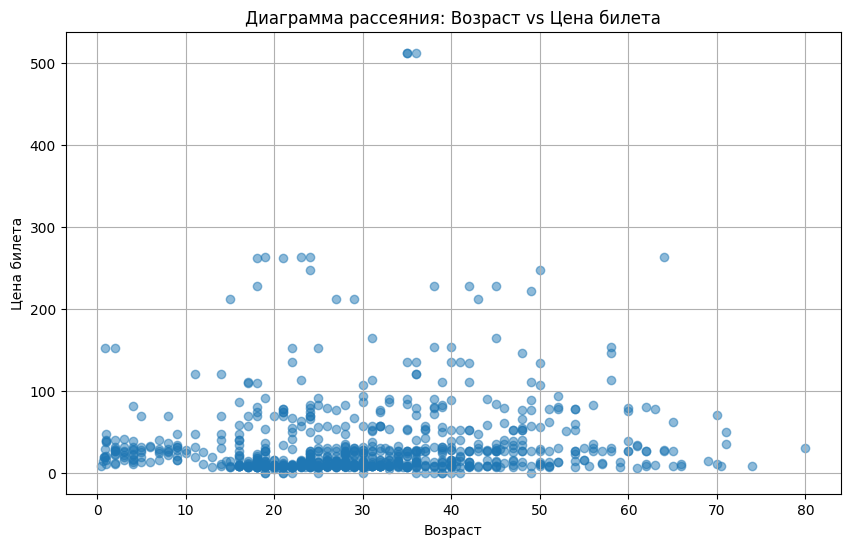

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title('Диаграмма рассеяния: Возраст vs Цена билета')
plt.xlabel('Возраст')
plt.ylabel('Цена билета')
plt.grid(True)
plt.show()

8. Отнормируйте значения признаков "Возраст" и "Цена билета". Выведите на экран полученный датасет.

In [ ]:
s['Age'] = (s['Age'] - s['Age'].min()) / (s['Age'].max() - s['Age'].min())
s['Fare'] = (s['Fare'] - s['Fare'].min()) / (s['Fare'].max() - s['Fare'].min())
s

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,female,male
0,0,3,0.271174,1,0,0.014151,False,True
1,1,1,0.472229,1,0,0.139136,True,False
2,1,3,0.321438,0,0,0.015469,True,False
3,1,1,0.434531,1,0,0.103644,True,False
4,0,3,0.434531,0,0,0.015713,False,True
...,...,...,...,...,...,...,...,...
882,0,2,0.334004,0,0,0.025374,False,True
883,1,1,0.233476,0,0,0.058556,True,False
884,0,3,0.082684,1,2,0.045771,True,False
885,1,1,0.321438,0,0,0.058556,False,True


9. Постройте гистограммы распределения пассажиров по полу и по возрасту для каждого класса. Расположите гистограммы одна под другой. Оси абсцисс должны быть однаковыми.

In [109]:
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


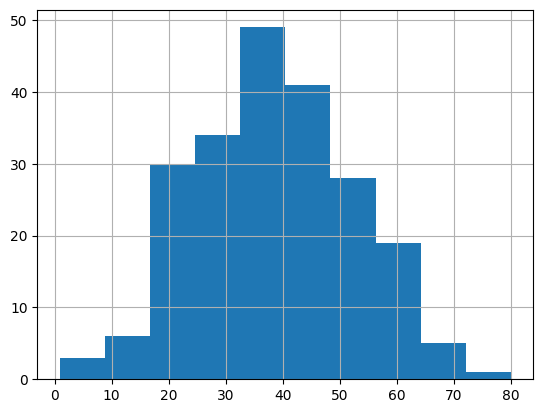

In [111]:
p1 = df[df["Pclass"] == 1]
p2 = df[df["Pclass"] == 2]
p3 = df[df["Pclass"] == 3]
hist1 = p1["Age"].hist()


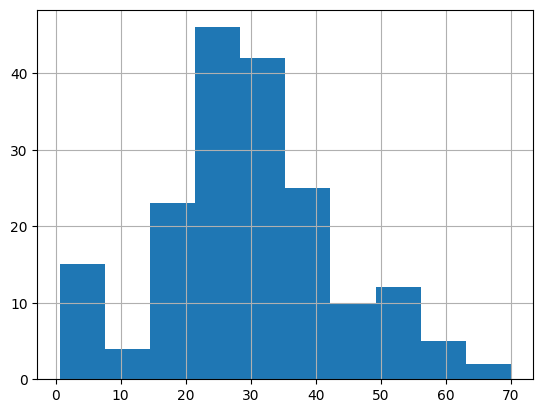

In [ ]:
hist2 = p2["Age"].hist()

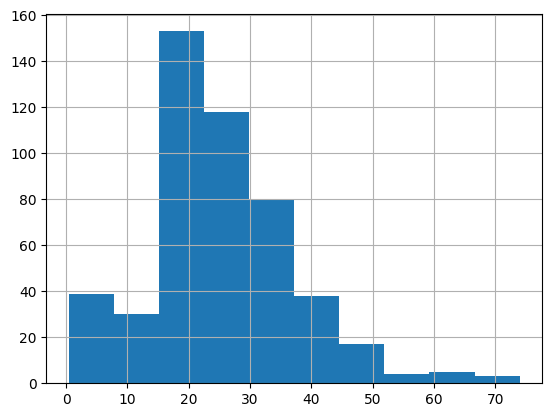

In [ ]:
hist3 = p3["Age"].hist()

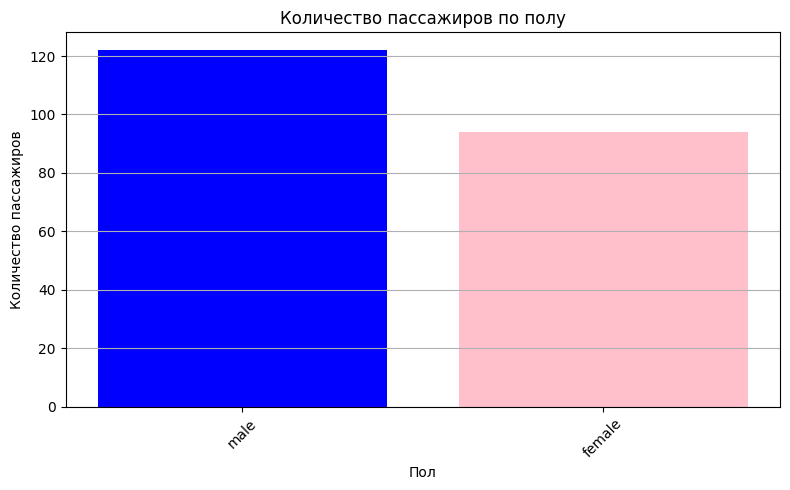

In [115]:

gender_counts = p1['Sex'].value_counts()

# Построение гистограммы
plt.figure(figsize=(8, 5))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.title('Количество пассажиров по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Показать график
plt.tight_layout()
plt.show()

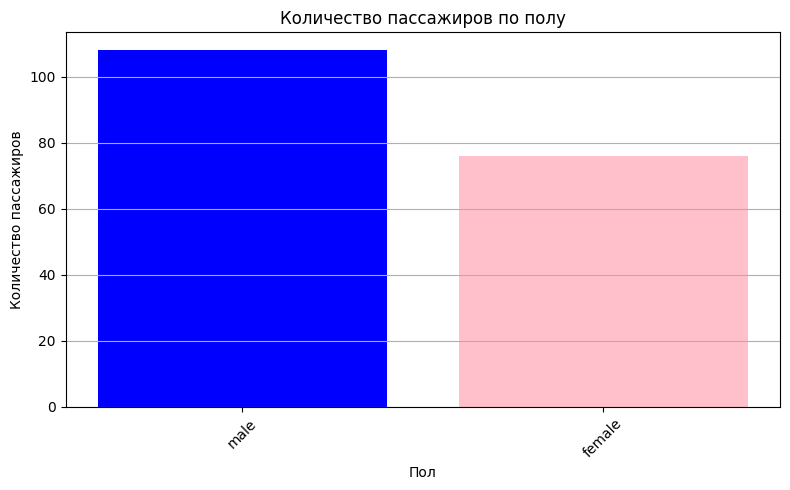

In [116]:

gender_counts = p2['Sex'].value_counts()

# Построение гистограммы
plt.figure(figsize=(8, 5))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.title('Количество пассажиров по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Показать график
plt.tight_layout()
plt.show()

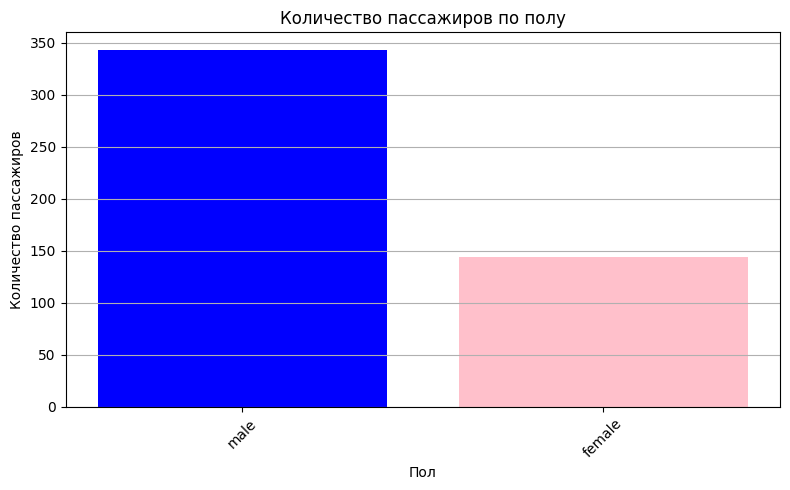

In [117]:

gender_counts = p3['Sex'].value_counts()

# Построение гистограммы
plt.figure(figsize=(8, 5))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.title('Количество пассажиров по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Показать график
plt.tight_layout()
plt.show()

10. Сделайте выводы по работе.